## Numerical Implementation of first order derivatives

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

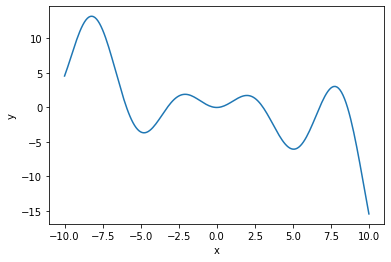

In [3]:
x_list = np.linspace(-10,10,201)
y_list = f(x_list)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_list,y_list)

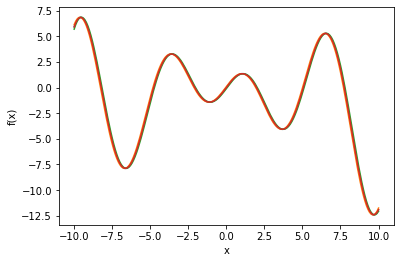

In [4]:
x_list = np.linspace(-10,10,201)
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*(x_list)**2

h = 0.1
forward_d_list = (f(x_list + h) - f(x_list))/ h
backward_d_list = (f(x_list) - f(x_list - h))/ h
central_d_list = (f(x_list + h) - f(x_list - h))/ (2*h)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list,analytical_d_list)
plt.plot(x_list,forward_d_list)
plt.plot(x_list,backward_d_list)
plt.plot(x_list,central_d_list)

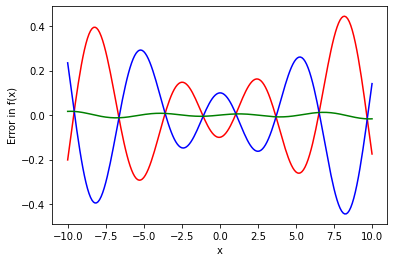

In [5]:
plt.xlabel('x')
plt.ylabel('Error in f(x)')

plt.plot(x_list , analytical_d_list - forward_d_list, 'red')
plt.plot(x_list , analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list , analytical_d_list - central_d_list, 'green')

## Higher accuracy(Richardson Method)

In [9]:
def D1Richardson(f,x,h):
    return 1/(12*h) * (f(x - 2*h) - 8*f(x-h) + 8*f(x+h) - f(x + 2*h))

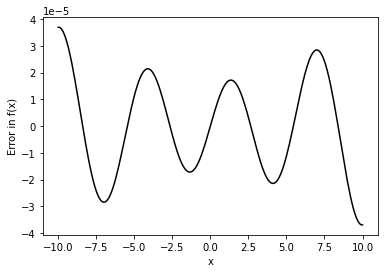

In [12]:
plt.xlabel('x')
plt.ylabel('Error in f(x)')

Richardson_d_list = D1Richardson(f,x_list,h)

# plt.plot(x_list , analytical_d_list - forward_d_list, 'red')
# plt.plot(x_list , analytical_d_list - backward_d_list, 'blue')
# plt.plot(x_list , analytical_d_list - central_d_list, 'green')
plt.plot(x_list , analytical_d_list - Richardson_d_list, 'black')

## Even higher accuracy

In [20]:
def D1nRichardson(nmax,f,x,h):
    d0 = np.array([1/(12* h*2**j) * (f(x - 2 * h*2**j) - 8*f(x - h*2**j) + 8*f(x + h*2**j) - f(x + 2*h*2**j)) 
                  for j in range(0,nmax)])
    for n in range(1,nmax):
        #print(d0)
        d = np.array([ (2**(2*n)*d0[j] - d0[j+1])/ (2**(2*n)-1) for j in range(0,len(d0)-1) ])
        d0 = d
    return d

In [21]:
D1nRichardson(5,f,3,h)

array([-3.09885748])

In [22]:
np.cos(3)*3 + np.sin(3) - 3/100*(3)**2

-3.098857481741469

In [23]:
np.cos(3)*3 + np.sin(3) - 3/100*(3)**2 - D1nRichardson(5,f,3,h)

array([1.18064047e-09])

## Second Derivatives

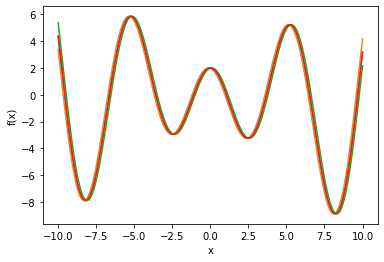

In [24]:
x_list = np.linspace(-10,10,201)
analytical_d2_list = -np.sin(x_list)*x_list + 2*np.cos(x_list) - 6/100*(x_list)

h = 0.1
forward_d_list = (f(x_list + 2*h) - 2*f(x_list+h) + f(x_list))/ h**2
backward_d_list = (f(x_list) - 2*f(x_list - h) + f(x_list - 2*h))/ h**2
central_d_list = (f(x_list + h) - 2*f(x_list) + f(x_list - h))/ h**2

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list,analytical_d2_list)
plt.plot(x_list,forward_d_list)
plt.plot(x_list,backward_d_list)
plt.plot(x_list,central_d_list)

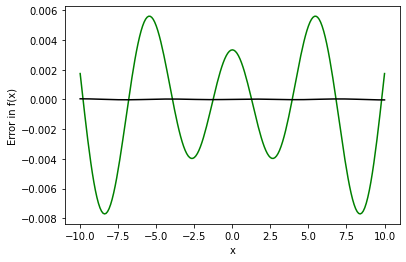

In [27]:
plt.xlabel('x')
plt.ylabel('Error in f''(x)')

Richardson_d2_list = D1Richardson(f,x_list,h)

# plt.plot(x_list , analytical_d2_list - forward_d_list, 'red')
# plt.plot(x_list , analytical_d2_list - backward_d_list, 'blue')
plt.plot(x_list , analytical_d2_list - central_d_list, 'green')
plt.plot(x_list , analytical_d_list - Richardson_d2_list, 'black')

# Gradient

In [28]:
def f(r):
    return np.exp(- r[0]**2 - r[1]**4)

def g(r):
    return r/np.linalg.norm(r)

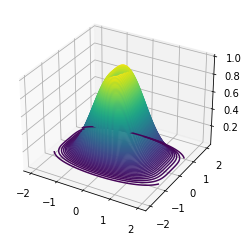

In [30]:
x3 , y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f(np.array([x3,y3]))

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

In [31]:
plt.rcParams['figure.figsize'] = [15,10]

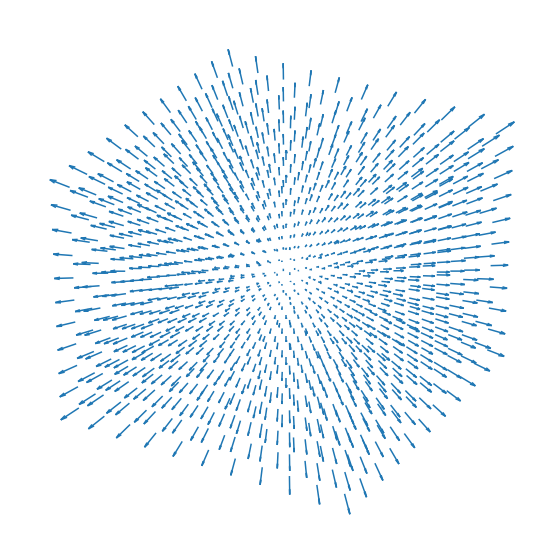

In [33]:
x3,y3,z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g(np.array([x3,y3,z3]))

arrowplot = plt.axes(projection = '3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
        x3,y3,z3,
        values[0]*scale,values[1]*scale,values[2]*scale
)

In [34]:
def gradient(f,r,h):
    x,y,z = r
    partialx =( f(np.array([x+h,y,z])) - f(np.array([x,y,z])) )/h
    partialy =( f(np.array([x,y+h,z])) - f(np.array([x,y,z])) )/h
    partialz =( f(np.array([x,y,z+h])) - f(np.array([x,y,z])) )/h
    return np.array([partialx,partialy,partialz])

In [35]:
r = np.array([0.5,-1.2,-8])
h = 0.0001

gradient(f,r,h)

array([-0.09792533,  0.67697537,  0.        ])

# Divergence

In [39]:
def divergence(g,r,h):
    x,y,z = r
    dgxdx = (g(np.array([x+h,y,z]))[0] - g(np.array([x-h,y,z]))[0]) / 2*h
    dgydy = (g(np.array([x,y+h,z]))[1] - g(np.array([x,y-h,z]))[1]) / 2*h
    dgzdz = (g(np.array([x,y,z+h]))[2] - g(np.array([x,y,z-h]))[2]) / 2*h
    return dgxdx + dgydy + dgzdz

In [42]:
divergence(g,r,h)

2.467631836402043e-09

In [43]:
2 / np.linalg.norm(r)

0.24676318365598574